<a href="https://colab.research.google.com/github/pedroblossbraga/Deep-Learning-Regression/blob/master/LSTM_with_FLRY3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# stock price prediction using python & machine learning

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# get the stock quote FLRY3
df = web.DataReader('FLRY3.SA', data_source='yahoo', start='2012-01-01', 
                    end='2021-01-02')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,10.960000,10.660,10.890000,10.660000,84400.0,7.517550
2012-01-03,11.010000,10.700,10.980000,10.875000,525000.0,7.669173
2012-01-04,11.120000,10.780,11.120000,10.805000,174400.0,7.619809
2012-01-05,10.990000,10.660,10.660000,10.750000,136600.0,7.581020
2012-01-06,10.900000,10.665,10.750000,10.800000,39800.0,7.616283
...,...,...,...,...,...,...
2020-12-22,26.980000,26.570,26.770000,26.730000,1258200.0,25.977762
2020-12-23,27.000000,26.500,26.740000,26.559999,1431600.0,25.812546
2020-12-28,27.160000,26.520,26.680000,27.129999,852700.0,26.366505


In [ ]:
df.shape

(2229, 6)

In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2229.000000,2229.000000,2229.000000,2229.000000,2.229000e+03,2229.000000
mean,17.279904,16.765828,17.033708,17.019280,1.226133e+06,14.698039
std,8.167794,7.903799,8.047954,8.036671,1.528643e+06,8.087967
min,6.700000,6.500000,6.650000,6.700000,0.000000e+00,5.123433
25%,9.360000,9.150000,9.280000,9.255000,3.982000e+05,6.913568
50%,13.750000,13.475000,13.605000,13.675000,9.520000e+05,11.024483
75%,25.260000,24.440001,24.920000,24.860001,1.671500e+06,23.120956
max,34.090000,32.730000,33.500000,33.500000,5.178200e+07,31.906845


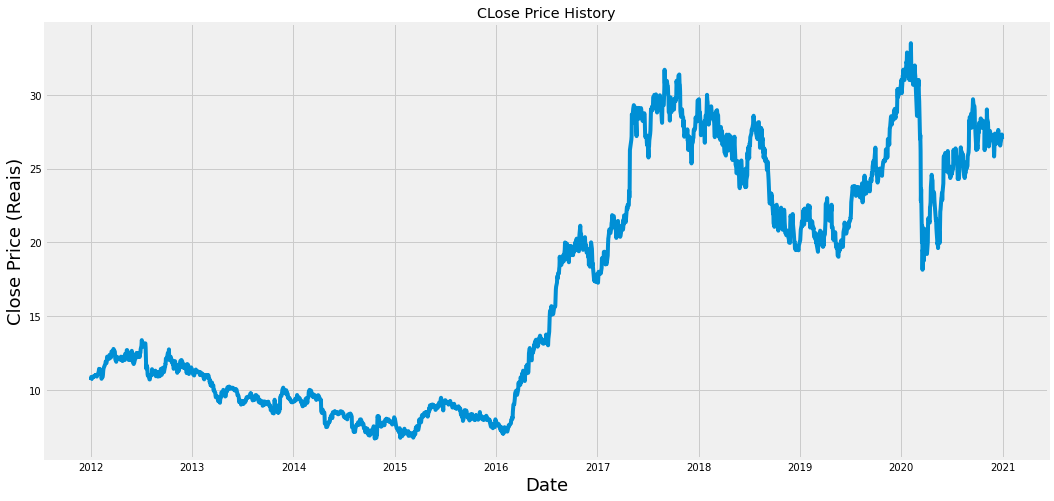

In [ ]:
plt.figure(figsize=(16,8))
plt.title('CLose Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Reais)', fontsize=18)
plt.show()

In [ ]:
# dataframe with only the close column
data = df.filter(['Close'])
# df -> np.array
dataset = data.values
# compute the N. of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

print(training_data_len)

1784


In [ ]:
# scale the data before it's presented to the neural net
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14776119],
       [0.15578359],
       [0.15317166],
       ...,
       [0.7623134 ],
       [0.76902983],
       [0.75820897]])

In [ ]:
# create the training dataset
# create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]

#split the data into X_train and y_train datasets
x_train, y_train = [],[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([0.14776119, 0.15578359, 0.15317166, 0.15111941, 0.15298509,
       0.15615673, 0.15652987, 0.15708955, 0.15578359, 0.15802241,
       0.15802241, 0.16044777, 0.15858209, 0.1602612 , 0.15858209,
       0.15671641, 0.15858209, 0.16044777, 0.16324627, 0.16977613,
       0.17630598, 0.17518659, 0.17537313, 0.17350748, 0.17332091,
       0.16958955, 0.16604477, 0.15111941, 0.15391791, 0.15578359,
       0.16063434, 0.17070895, 0.17630598, 0.17891791, 0.18936566,
       0.1949627 , 0.19123134, 0.19757463, 0.20690299, 0.20708956,
       0.20186566, 0.20149256, 0.20149256, 0.20149256, 0.20522388,
       0.21175374, 0.20447763, 0.20522388, 0.20522388, 0.21455224,
       0.22014927, 0.22014927, 0.21268656, 0.21641792, 0.21455224,
       0.2266791 , 0.22201492, 0.2210821 , 0.21958956, 0.20522388]), array([0.15578359, 0.15317166, 0.15111941, 0.15298509, 0.15615673,
       0.15652987, 0.15708955, 0.15578359, 0.15802241, 0.15802241,
       0.16044777, 0.15858209, 0.1602612 , 0.15858209, 0.15

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1724, 60, 1)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# loss function mesures how well the model did on training
# optimizer to improve upon the loss function

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1724/1724 [==============================] - 40s 22ms/step - loss: 0.0058


In [ ]:
# Create the testing dataset
# create a new array containing scaled values from index training_data_len to 2003

test_data = scaled_data[training_data_len - 60:, :]

# create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [ ]:
# convert the data to a np.array
x_test = np.array(x_test)
x_test.shape

(445, 60)

In [ ]:
# reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# get the root mean squared error 

rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.9287431395455693

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


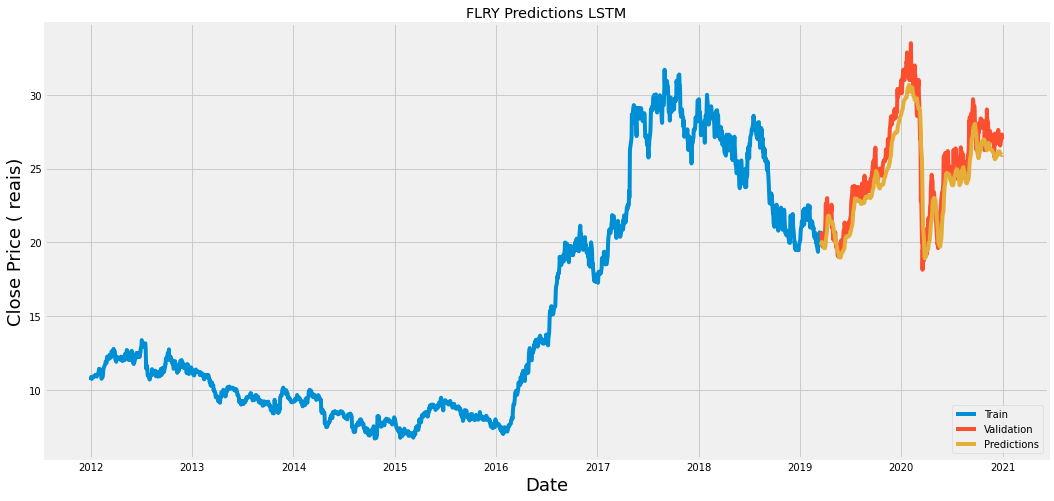

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('FLRY Predictions LSTM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ( reais)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# get the quote
flry_quote = web.DataReader('FLRY3.SA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# create a new dataframe
new_df = flry_quote.filter(['Close'])
# get the last 60 day closing price values and convert the df to array
last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

#reshape 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[28.40949]]


In [ ]:
# get the quote
flry_quote2 = web.DataReader('FLRY3.SA', data_source='yahoo', start='2019-12-18', end='2019-12-18')

print(flry_quote2['Close'])

Date
2019-12-18    29.85
2019-12-19    30.40
Name: Close, dtype: float64


In [ ]:
flry_quote2['Close'].values[0] - pred_price[0][0]

1.4405097961425781